**OCR(Optical character recog) and it's used to recognize text in an image**

In [1]:
# 11th

!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13948 sha256=0c726967e1a6d8ae6bc4f328761892496814c73fb489b965313c5c57ea0a8d16
  Stored in directory: c:\users\neo\appdata\local\pip\cache\wheels\ac\5b\f4\d5bcc930771126a32285e058c576eda84e43691453a9f7ad71
Successfully built pytesseract


In [2]:
!pip install Pillow

In [1]:
import pytesseract
from PIL import Image, ImageFilter

import numpy as np
import matplotlib.pyplot as plt
from skimage import color
import cv2
import io

In [2]:
seafood = Image.open("./datasets/images/seafood.png")

print(seafood.format, seafood.size, seafood.mode)  # mode is color channel

PNG (587, 163) RGBA


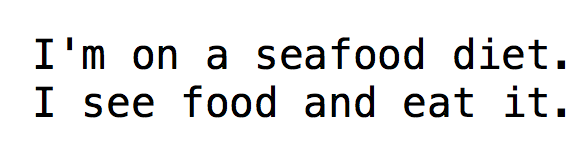

In [3]:
seafood # can be shown directly since a png file

In [4]:
# OCR
text = pytesseract.image_to_string(seafood, lang = "eng")

print(text)

I'm on a seafood diet.
I see food and eat it.



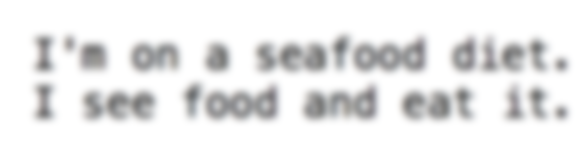

In [11]:
# blur image and text ocr on it
seafood_blur = seafood.filter(ImageFilter.GaussianBlur(4))
seafood_blur

In [12]:
text_blur = pytesseract.image_to_string(seafood_blur, lang = "eng")
print(text_blur)

seafood diet.
and eat it.



In [ ]:
# adds noise to background of this image
seafood_array = np.array(seafood)

seafood_grey = color.rgb2gray(seafood_array)

noise = np.ones_like(seafood_grey) * 0.2 * (seafood_grey.max() - seafood_grey.min())

noise[np.random.random(size=noise.shape) > 0.5] *= -1

In [ ]:
seafood_noisy = seafood_grey + noise

plt.imshow(seafood_noisy, cmap ="grey")

plt.show();

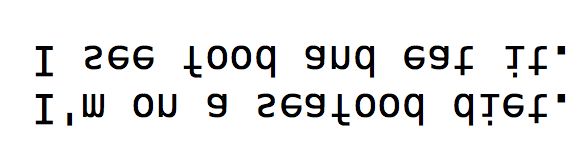

In [13]:
# flip image and see how tesseract works
seafood_flipped = seafood.transpose(Image.FLIP_TOP_BOTTOM)
seafood_flipped

In [14]:
text_flipped = pytesseract.image_to_string(seafood_flipped, lang="eng")
print(text_flipped)

I 266 ,00q 9uq 69F TL"
I,W OU 9 269,00q qI6s"



In [16]:
# gets text and store as a pdf file
pdf_bytes = pytesseract.image_to_pdf_or_hocr("./datasets/images/seafood.png", extension = "pdf")

In [18]:
new_file = open("seafood.pdf", "wb")
new_file_byte_array = bytearray(pdf_bytes)  # bytes array of pdf file

In [19]:
new_file.write(new_file_byte_array)
new_file.close()